In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




## Text summarization

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
%pip install PyPDF2
import PyPDF2
from io import StringIO
!pip install pdfminer.six
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# convert pdf to text i.e re-use
# returns text of string
def convert_pdf_to_string(file_path):
	output_string = StringIO()
	with open(file_path, 'rb') as in_file:
	    parser = PDFParser(in_file)
	    doc = PDFDocument(parser)
	    rsrcmgr = PDFResourceManager()
	    device = TextConverter(rsrcmgr, output_string, laparams = LAParams())
	    interpreter = PDFPageInterpreter(rsrcmgr, device)
	    for page in PDFPage.create_pages(doc):
	        interpreter.process_page(page)


	return(output_string.getvalue())

In [71]:
path = '/content/drive/MyDrive/Colab/DIY_learning/NLP_project/The Lord of the Rings_ The Two Towers.pdf'
pdf_text = convert_pdf_to_string(path)

In [72]:
type(pdf_text)

str

In [73]:
pdf_text[:200]

'\x0c\x0c\x0ciii\n\nTHE TWO\nTOWERS\n\nbeing the second part of\n\nTHE LORD OF THE RINGS\n\nby\n\nJ.R.R. TOLKIEN\n\n\x0c\x0cThree Rings for the Elven-kings under the sky,\n\nSeven for the Dwarf-lords in their halls of stone,\n\nNine '

## EDA

In [74]:
# Cleaning text i.e.re-use
# removes puntuation, \n, \n between lines, convert into lower case
def cleanText(text):
  clean_text = re.sub('[^A-Za-z]+', ' ', text)
  clean_text = clean_text.casefold()
  return clean_text

In [75]:
test = cleanText(pdf_text)
print(test[:20])

 iii the two towers 


In [76]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [77]:
from nltk.stem import WordNetLemmatizer

# token_stop_pos tagger i.e re-use
# tokenize, remove stopwords & pos tag, save it in a newlist
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# Lemmatization
def lemma_word(pos_data):
  wordnet_lemmatizer = WordNetLemmatizer()
  lemma_sentence = []
  for word, tag in pos_data:
    if tag is None:
      lemma_sentence.append(word)
    else:
      lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, tag))
  lemma_sentence = ' '.join(lemma_sentence)
  return lemma_sentence

## Testing

In [78]:
# Tokenisation, stopwords removal, POS

test1 = token_stop_pos(test)
print(test1[:200])

[('iii', 'v'), ('two', None), ('towers', 'n'), ('second', 'a'), ('part', 'n'), ('lord', 'n'), ('rings', 'n'), ('j', 'n'), ('r', 'n'), ('r', 'n'), ('tolkien', 'v'), ('three', None), ('rings', 'n'), ('elven', 'a'), ('kings', 'n'), ('sky', 'n'), ('seven', None), ('dwarf', 'n'), ('lords', 'n'), ('halls', 'n'), ('stone', 'n'), ('nine', None), ('mortal', 'a'), ('men', 'n'), ('doomed', 'v'), ('die', 'v'), ('one', None), ('dark', 'n'), ('lord', 'n'), ('dark', 'n'), ('throne', 'n'), ('land', 'n'), ('mordor', 'n'), ('shadows', 'n'), ('lie', 'v'), ('one', None), ('ring', 'n'), ('rule', 'v'), ('one', None), ('ring', 'n'), ('nd', 'v'), ('one', None), ('ring', 'n'), ('bring', 'v'), ('darkness', 'n'), ('bind', None), ('land', 'n'), ('mordor', 'n'), ('shadows', 'n'), ('lie', 'v'), ('synopsis', 'n'), ('second', 'a'), ('part', 'n'), ('lord', 'n'), ('rings', 'n'), ('rst', 'a'), ('part', 'n'), ('fellowship', 'n'), ('ring', 'n'), ('told', 'v'), ('gandalf', None), ('grey', 'n'), ('discovered', 'v'), ('ring'

In [80]:
# Lemmatisation

text2 = lemma_word(test1)
print(text2[:50])

iii two tower second part lord ring j r r tolkien 


In [81]:
text2 = word_tokenize(text2)
print(text2[:50])

['iii', 'two', 'tower', 'second', 'part', 'lord', 'ring', 'j', 'r', 'r', 'tolkien', 'three', 'ring', 'elven', 'king', 'sky', 'seven', 'dwarf', 'lord', 'hall', 'stone', 'nine', 'mortal', 'men', 'doom', 'die', 'one', 'dark', 'lord', 'dark', 'throne', 'land', 'mordor', 'shadow', 'lie', 'one', 'ring', 'rule', 'one', 'ring', 'nd', 'one', 'ring', 'bring', 'darkness', 'bind', 'land', 'mordor', 'shadow', 'lie']


In [82]:
data = {'Tokens':[], 'Polarity':[], 'Analysis':[]}
sent_val_df = pd.DataFrame(data)
sent_val_df

,Tokens,Polarity,Analysis


In [83]:
sent_val_df['Tokens'] = text2
sent_val_df.head(5)

,Tokens,Polarity,Analysis
0,iii,NaN,NaN
1,two,NaN,NaN
2,tower,NaN,NaN
3,second,NaN,NaN
4,part,NaN,NaN


In [84]:
from textblob import TextBlob

# Function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# Function assign label for scores
def review_analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [85]:
sent_val_df['Polarity'] = sent_val_df['Tokens'].apply(getPolarity)
sent_val_df['Analysis'] = sent_val_df['Polarity'].apply(review_analysis)
sent_val_df.head(5)

,Tokens,Polarity,Analysis
0,iii,0.0,Neutral
1,two,0.0,Neutral
2,tower,0.0,Neutral
3,second,0.0,Neutral
4,part,0.0,Neutral


## Vader analysis

In [86]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to assign sentiment score
def vadersentimentanalysis(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

# Function to label sentiment score
def vader_analysis(compound):
  if compound >= 0.5:
    return 'Positive'
  elif compound <= -0.5:
    return 'Negative'
  else:
    return 'Neutral'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
sent_val_df['VaderSentiment'] = sent_val_df['Tokens'].apply(vadersentimentanalysis)
sent_val_df['VaderAnalysis'] = sent_val_df['VaderSentiment'].apply(vader_analysis)


In [88]:
sent_val_df.head()

,Tokens,Polarity,Analysis,VaderSentiment,VaderAnalysis
0,iii,0.0,Neutral,0.0,Neutral
1,two,0.0,Neutral,0.0,Neutral
2,tower,0.0,Neutral,0.0,Neutral
3,second,0.0,Neutral,0.0,Neutral
4,part,0.0,Neutral,0.0,Neutral


In [89]:
vaderCounts = sent_val_df['VaderAnalysis'].value_counts()
vaderCounts.head()

Neutral     74320
Positive     1329
Negative     1159
Name: VaderAnalysis, dtype: int64

In [90]:
from matplotlib import pyplot as plt
%matplotlib inline

def create_pie(vadervalues):
  plt.figure(figsize = (20, 10))
  plt.subplot(1,3,2)
  plt.title('Vader results')
  plt.pie(vadervalues.values, labels = vadervalues.index, explode = (0, 0, 0.25), autopct = '%1.1f%%', shadow = False)


## Sentiment analysis using vader without summarization

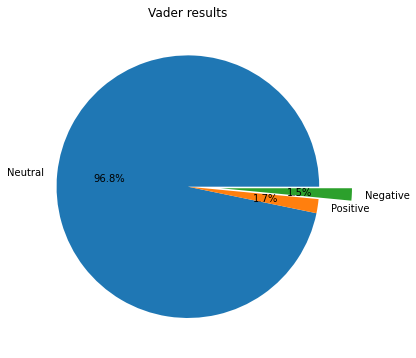

In [91]:
create_pie(vaderCounts)

## Sentiment analysis using textblob without summarization



In [92]:
blob_counts = sent_val_df['Analysis'].value_counts()
blob_counts.head()

Neutral     67621
Positive     4757
Negative     4430
Name: Analysis, dtype: int64

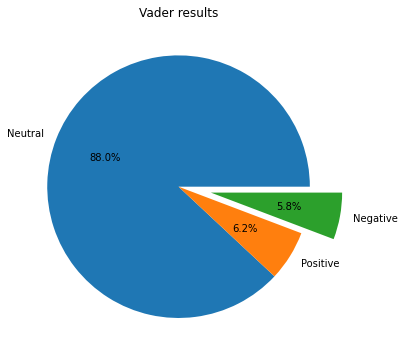

In [93]:
create_pie(blob_counts)

## Copy text

In [95]:
# creating copy of pdf_text
txt_cpy = pdf_text[:]
txt_cpy[:50]

'\x0c\x0c\x0ciii\n\nTHE TWO\nTOWERS\n\nbeing the second part of\n\n'

In [96]:
txt_cpy = cleanText(txt_cpy)
print(txt_cpy[:50])

 iii the two towers being the second part of the l


In [97]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt') 
nltk.download('stopwords') 

my_stopwords = stopwords.words('english')

# create tokens i.e. re-use
def createTokens(text):
  return word_tokenize(text)

# remove stopwords
def removeStopwords(tokens):
  no_stopword_tokens = [word for word in tokens if not word in my_stopwords]
  return no_stopword_tokens

# return words frequency table
# Tokens as parameter after removing stop words i.e re-use
def wordCount(tokens):
  freqTable = dict()
  for word in tokens:
    if word in my_stopwords:
      continue
    if word in freqTable:
      freqTable[word] += 1
    else:
      freqTable[word] = 1
  return freqTable

# create word cloud, text - string data type
def create_cloud(text):
  word_cloud = WordCloud(width = 3000, height = 2000, collocations = False, background_color = 'white').generate(text)
  plt.figure(figsize=(25, 15))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
tokens = createTokens(txt_cpy)
tokens = removeStopwords(tokens)
test_freqTable = wordCount(tokens)

In [102]:
import itertools

# itertools is for dictionary
out = dict(itertools.islice(test_freqTable.items(), 5))
print(out)

{'iii': 4, 'two': 355, 'towers': 225, 'second': 24, 'part': 63}


## Sentence tokenize

In [103]:
from nltk.tokenize import sent_tokenize

# creating sentence score for text
def sentScore(text, freqTable):
  text = text.strip()
  text = text.replace('\n', '')
 
  sentences = sent_tokenize(text)
  sentenceValue = dict()

  for sentence in sentences:
    for word, freq in freqTable.items():
      if word in sentence.lower():
        if sentence in sentenceValue:
          sentenceValue[sentence] += freq
        else:
          sentenceValue[sentence] = freq
  return sentenceValue

In [104]:
s_value = sentScore(pdf_text, test_freqTable)

In [105]:
# print sentence scores
i = 0
for x, y in s_value.items():
  if(i == 5):
    break
  else:
    print(x, y)
    i += 1

iiiTHE TWOTOWERSbeing the second part ofTHE LORD OF THE RINGSbyJ.R.R. 1526
TOLKIENThree Rings for the Elven-kings under the sky,Seven for the Dwarf-lords in their halls of stone,Nine for Mortal Men doomed to die,One for the Dark Lord on his dark throneIn the Land of Mordor where the Shadows lie.One Ring to rule them all, One Ring to ﬁnd them,One Ring to bring them all and in the darkness bind themIn the Land of Mordor where the Shadows lie..SYNOPSISThis is the second part of The Lord of the Rings.The ﬁrst part, The Fellowship of the Ring, told how Gandalfthe Grey discovered that the ring possessed by Frodo theHobbit was in fact the One Ring, ruler of all the Rings ofPower. 5576
It recounted the ﬂight of Frodo and his companionsfrom the quiet Shire of their home, pursued by the terror ofthe Black Riders of Mordor, until at last, with the aid ofAragorn the Ranger of Eriador, they came through desperateperils to the house of Elrond in Rivendell.There was held the great Council of Elro

## heapq summarization & model building

In [106]:
# summarization using heapq
import heapq

heapq_summary = heapq.nlargest(30, s_value, key = s_value.get)
heapq_summary = ' '.join(heapq_summary)
print(heapq_summary)

Thereshe crouched, her shuddering belly splayed upon the ground,the great bows of her legs quivering, as she gathered herselffor another spring – this time to crush and sting to death: no954the two towerslittle bite of poison to still the struggling of her meat; thistime to slay and then to rend.Even as Sam himself crouched, looking at her, seeing hisdeath in her eyes, a thought came to him, as if some remotevoice had spoken, and he fumbled in his breast with his lefthand, and found what he sought: cold and hard and solid itseemed to his touch in a phantom world of horror, the Phialof Galadriel.‘Galadriel!’ he said faintly, and then he heard voices far offbut clear: the crying of the Elves as they walked under thestars in the beloved shadows of the Shire, and the music ofthe Elves as it came through his sleep in the Hall of Fire inthe house of Elrond.Gilthoniel A Elbereth!And then his tongue was loosed and his voice cried in alanguage which he did not know:A Elbereth Gilthonielo menel

In [108]:
heapq_summary[:50]

'Thereshe crouched, her shuddering belly splayed up'

### vader model

In [109]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
def sentiment_score(sentence):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(sentence)

  print('Overall sentiment dictionary is: ', sentiment_dict)
  print('sentence was rated as: ', sentiment_dict['neg']*100, '% Negative')
  print('sentence was rated as: ', sentiment_dict['neu']*100, '% Neutral')
  print('sentence was rated as: ', sentiment_dict['pos']*100, '%Positive')
  print('sentence overall rated as: ', end = ' ')

  if sentiment_dict['compound'] >= 0.05:
    print("Positive")
  elif sentiment_dict['compound'] <= -0.05:
    print('Negative')
  else :
    print('Neutral')


In [111]:
sentiment_score(heapq_summary)

Overall sentiment dictionary is:  {'neg': 0.061, 'neu': 0.879, 'pos': 0.06, 'compound': 0.5892}
sentence was rated as:  6.1 % Negative
sentence was rated as:  87.9 % Neutral
sentence was rated as:  6.0 %Positive
sentence overall rated as:  Positive


### summary pie chart

In [112]:
col = {'Tokens':[]}
sum_df = pd.DataFrame(col)
sum_df

,Tokens


In [113]:
sum_clean = cleanText(heapq_summary) 
sum_clean[:50]

'thereshe crouched her shuddering belly splayed upo'

In [114]:
sum_tokens = createTokens(sum_clean)

In [115]:
sum_df['Tokens'] = sum_tokens
sum_df.head()

,Tokens
0,thereshe
1,crouched
2,her
3,shuddering
4,belly


In [116]:
sum_df['VaderSentiment'] = sum_df['Tokens'].apply(vadersentimentanalysis)
sum_df['VaderAnalysis'] = sum_df['VaderSentiment'].apply(vader_analysis)
sum_df.head()

,Tokens,VaderSentiment,VaderAnalysis
0,thereshe,0.0,Neutral
1,crouched,0.0,Neutral
2,her,0.0,Neutral
3,shuddering,0.0,Neutral
4,belly,0.0,Neutral


In [117]:
sum_pie = sum_df['VaderAnalysis'].value_counts()
sum_pie.head()

Neutral     3359
Negative      17
Positive      13
Name: VaderAnalysis, dtype: int64

## Sentiment analysis after heapq summarization

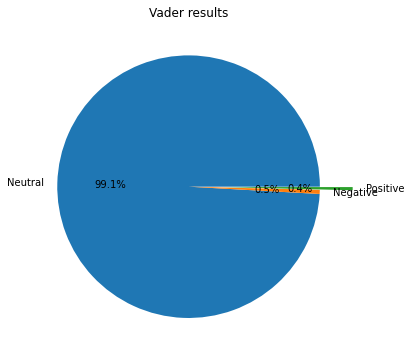

In [118]:
create_pie(sum_pie)

## Word cloud of heapq summary

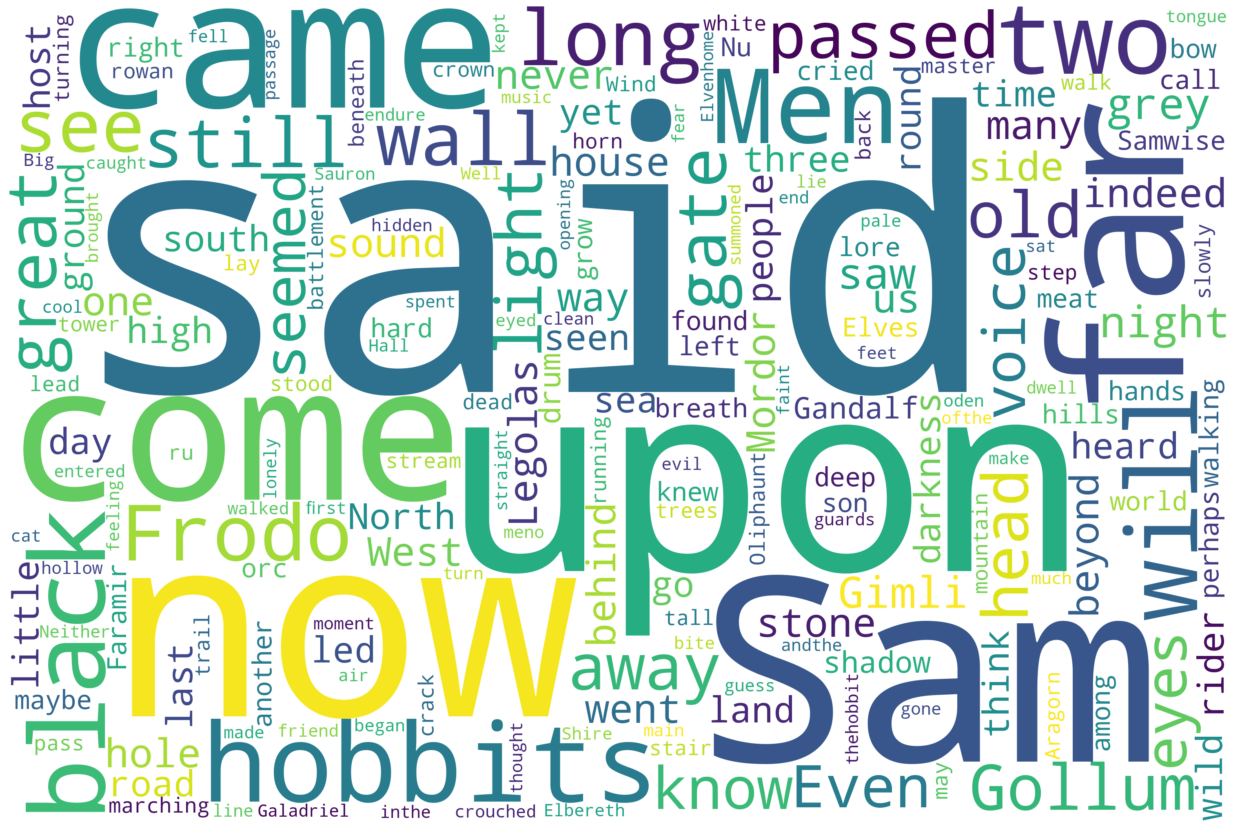

In [119]:
create_cloud(heapq_summary)

## Word cloud without summarization 

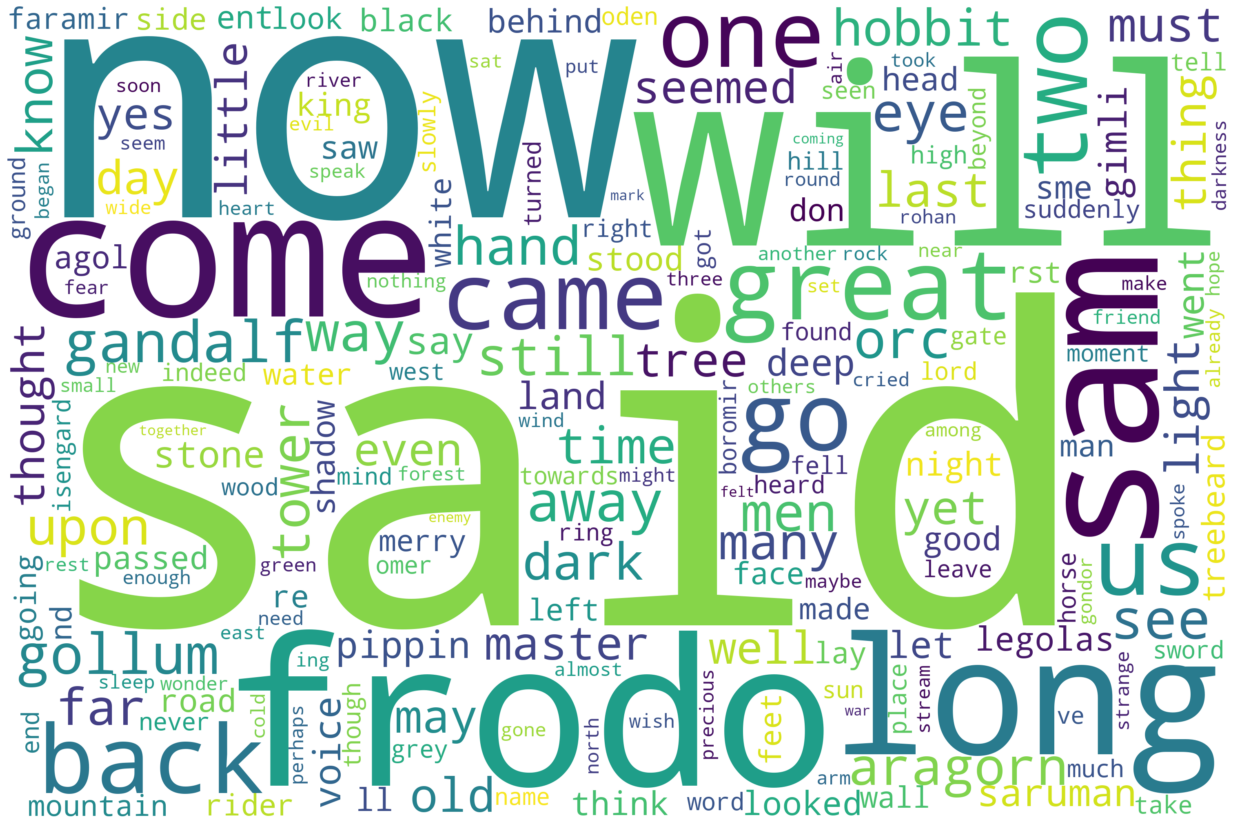

In [120]:
create_cloud(txt_cpy)